Loan Status with different models, binary classification, we need to predict whether we should give some one a loan or not depending on his/her information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


there are missing values

get descriptive statistics for continuous variables

In [6]:
df.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [8]:
df['Credit_History']=df['Credit_History'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


get descriptive statistics for categorical variables

In [9]:
df.describe(include = 'object')  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


Loan_ID is an irrelevant feature

In [10]:
df.drop('Loan_ID', axis=1, inplace=True)  
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
obj=df.describe(include = 'object')
def get_unique(check, file): 
    unique={}
    for x in check.columns:  
        unique[x]=file[x].unique()
    print(unique)
get_unique(check=obj, file=df)

{'Gender': array(['Male', 'Female', nan], dtype=object), 'Married': array(['No', 'Yes', nan], dtype=object), 'Dependents': array(['0', '1', '2', '3+', nan], dtype=object), 'Education': array(['Graduate', 'Not Graduate'], dtype=object), 'Self_Employed': array(['No', 'Yes', nan], dtype=object), 'Credit_History': array([1.0, 0.0, nan], dtype=object), 'Property_Area': array(['Urban', 'Rural', 'Semiurban'], dtype=object), 'Loan_Status': array(['Y', 'N'], dtype=object)}


In [12]:
#handle missing values 
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
def fill_missing (file):
    for i in range(len(file.columns)):
        if file.dtypes[i]==object:
            impute_value=file.iloc[:,i].mode()
            var=file.columns[i]
            file[var]=file[var].fillna(impute_value[0])
        else:
            impute_value=file.iloc[:,i].median()
            var=file.columns[i]
            file[var]=file[var].fillna(impute_value)
fill_missing(df)
df.isnull().sum().sort_values(ascending=False)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
cat_data = []
con_data = []

for i in range (len(df.columns)):
    if df.dtypes[i] == object:
        cat_data.append(df.iloc[:, i])  #all rows from that column
    else :
        con_data.append(df.iloc[:, i])  #will get a list here
        
cat_data = pd.DataFrame(cat_data).transpose()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [15]:
con_data = pd.DataFrame(con_data).transpose()
con_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


visualize the features, compare feature importance

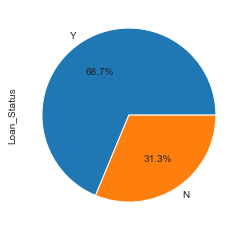

In [16]:
cat_data['Loan_Status'].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

slight imbalance

In [17]:
def get_barchart (axs,file, var, target_var):
    g = sns.countplot(ax=axs,x=var, hue=target_var , data=file)  #order=index control order of var
    patch = g.patches
    a = [p.get_height() for p in patch]
    num_column=len(file[var].unique())
    num_hue=len(file[target_var].unique())
    for i in range (num_column): 
        total = np.sum(a[i::num_column])
        for j in range (num_hue):  
            percentage = '{:.2f}%'.format(100 * a[(j*num_column + i)]/total)
            x = patch[j*num_column+i].get_x() + patch[j*num_column+i].get_width() / 2 -0.1    
            y = patch[j*num_column+i].get_y() + patch[j*num_column+i].get_height()            #the order of the patches
            g.annotate(percentage, (x, y), size = 12)

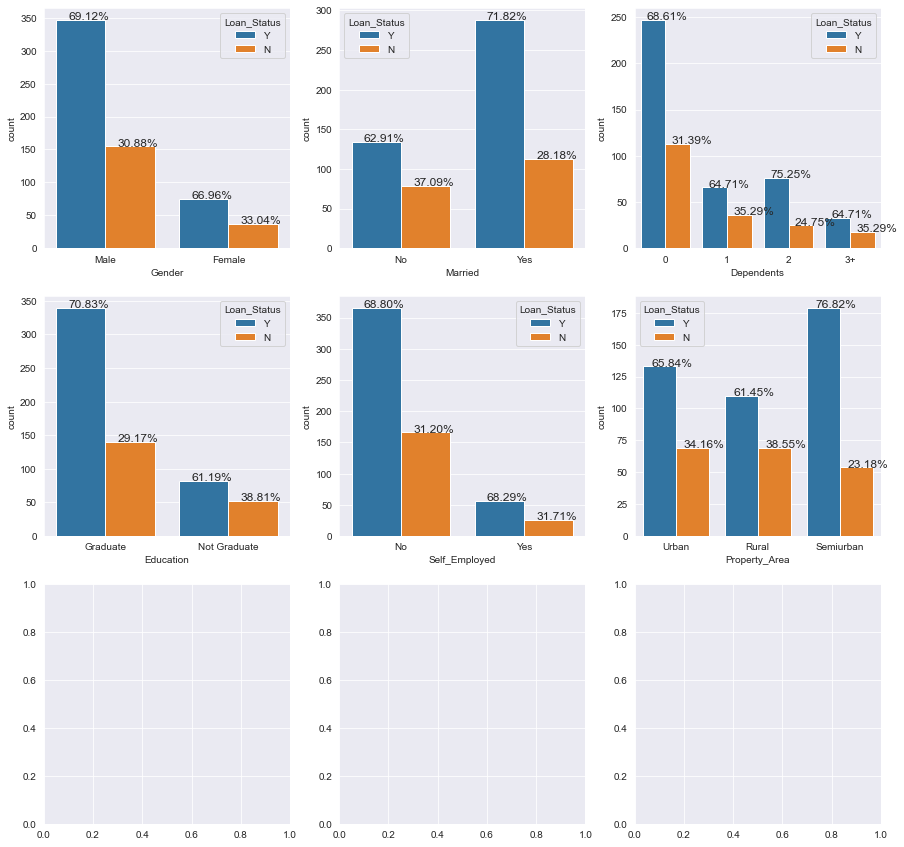

In [18]:
k=0
col = 3
row=math.ceil(len(cat_data.columns)/col)
fig, axs = plt.subplots(row,col, figsize=(15, 15))
for i in range (row):
    for j in range(col):
        if k<(len(cat_data.columns)-1):
            get_barchart(axs[i,j],cat_data, cat_data.columns[k],'Loan_Status')
            k+=1

In [19]:
df_con = pd.concat([ con_data,cat_data['Loan_Status']], axis=1)
df_con.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,Y
1,4583.0,1508.0,128.0,360.0,1.0,N
2,3000.0,0.0,66.0,360.0,1.0,Y
3,2583.0,2358.0,120.0,360.0,1.0,Y
4,6000.0,0.0,141.0,360.0,1.0,Y


In [20]:
def get_boxplot (axs,file,var, target_var):
    sns.boxplot(ax=axs,x=target_var, y=var, data=file)

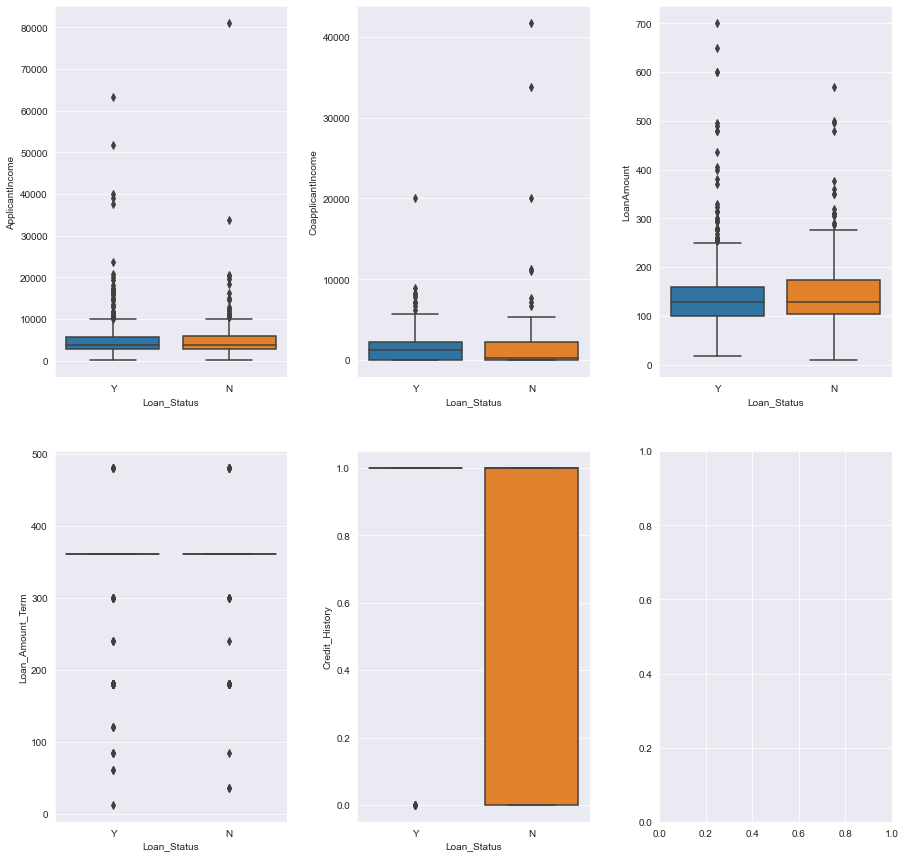

In [21]:
k=0
col = 3
row=math.ceil(len(con_data.columns)/col)
fig, axs = plt.subplots(row,col, figsize=(15, 15))
for i in range (row):
    for j in range(col):
        if k<len(con_data.columns):
            get_boxplot(axs[i,j],df_con, con_data.columns[k],'Loan_Status')
            k+=1
plt.subplots_adjust(wspace=0.3)

Based on the dataset, we are going to use LabelEncoder to transform categorical variables

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [23]:
# Transform the target column
target_values = {'Y':1, 'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_values)

# Transform other columns
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
print(target.head())
print(cat_data.head())
#df = pd.concat([cat_data, num_data, target], axis=1)
#print(df.head())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64
   Gender  Married  Dependents  Education  Self_Employed  Property_Area
0       1        0           0          0              0              2
1       1        1           1          0              0              0
2       1        1           0          0              1              2
3       1        1           0          1              0              2
4       1        0           0          0              0              2


Train the data
we are going to use train_test_split to split our data.
Following four models are used to train the data and compare the performance:
- LogisticRegression
- KNeighborsClassifier
- SVC
- DecisionTree

In [24]:
X = pd.concat([cat_data, con_data], axis=1) # features
y = target # target variables
#print(X, y)

In [25]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# We will use 4 different models for training

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {'LogisticRegression' : LogisticRegression(random_state=42),
          'KNeighborsClassifier' : KNeighborsClassifier(),
          'SVC' : SVC(random_state=42, probability=True),
          'DecisionTreeClassifier' : DecisionTreeClassifier(max_depth=2, random_state=42)
          }
#print(models)

Four metrics are used to evaluate the accuracy and quality of the models:
- precision: the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. It indicates how many True Positives were found
- recall: the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. It indicates how correctly our model identifying True Positives
- f1: a harmonic mean of the precision and recall
- accuracy_score: accuracy classification score

In [27]:
# Evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def eval(y_true, y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    print('pre: %.3f\n rec: %.3f\n f1: %.3f\n acc: %.3f\n' % (pre, rec, f1, acc))

In [28]:
# Train on training dataset
def train(models ,X, y):
    for name, model in models.items():
        print(name, ':')
        model.fit(X, y)
        eval(y, model.predict(X))
        print('-'*30)
train(models, X_train, y_train)

LogisticRegression :
pre: 0.807
 rec: 0.980
 f1: 0.885
 acc: 0.821

------------------------------
KNeighborsClassifier :
pre: 0.766
 rec: 0.921
 f1: 0.836
 acc: 0.746

------------------------------
SVC :
pre: 0.707
 rec: 1.000
 f1: 0.829
 acc: 0.709

------------------------------
DecisionTreeClassifier :
pre: 0.805
 rec: 0.987
 f1: 0.887
 acc: 0.823

------------------------------


We can see that the most accurate models are LogisticRegression and DecisionTree. Check AUC score and plot roc curve.
ROC curve can indicate the model performance. The closer the curve is to the 45-degree dashed line, the worse our model performs.

In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
def get_auc_scores(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(name, ':')
        y_train_score = model.predict_proba(X_train)[:, 1]
        y_test_score = model.predict_proba(X_test)[:, 1]
        auc_train = roc_auc_score(y_train, y_train_score)
        auc_test = roc_auc_score(y_test, y_test_score)
        print('Training AUC: ', auc_train)
        print('Testing AUC: ', auc_test)
        print('-'*30)
get_auc_scores(models, X_train, X_test, y_train, y_test)

LogisticRegression :
Training AUC:  0.7426604786984408
Testing AUC:  0.7916666666666667
------------------------------
KNeighborsClassifier :
Training AUC:  0.7630103770141315
Testing AUC:  0.4840384615384615
------------------------------
SVC :
Training AUC:  0.43820722740783236
Testing AUC:  0.4564102564102564
------------------------------
DecisionTreeClassifier :
Training AUC:  0.755436199614121
Testing AUC:  0.716923076923077
------------------------------


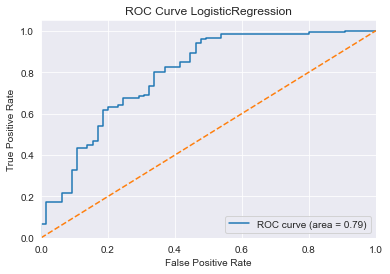

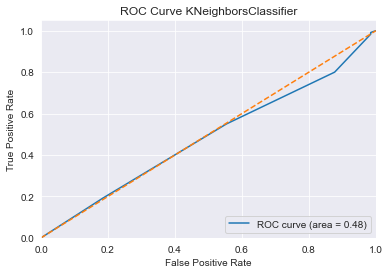

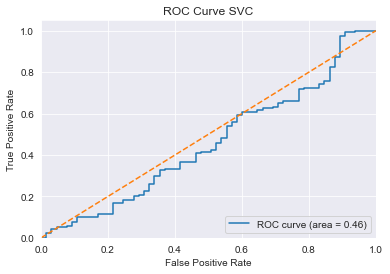

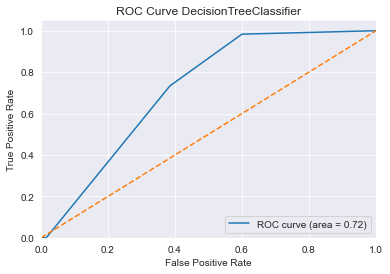

In [30]:
# plot ROC curve
for name, model in models.items():
    y_test_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' + str(name))
    plt.legend(loc='lower right')
    plt.show()

Cross validation:
Two cross validation methods are used:
- LeaveOneOut
- KFold
Both methods show similar results. However, KFold requires less computation resources and faster.

In [31]:
%%time
# Cross validation--- leave one out
# The number of folds (subsets) equals to the number of observations we have in the dataset very computationally expensive
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=LeaveOneOut())
    print(name, ':', np.mean(score))

LogisticRegression : 0.8181818181818182
KNeighborsClassifier : 0.6526806526806527
SVC : 0.7016317016317016
DecisionTreeClassifier : 0.8135198135198135
CPU times: total: 22.5 s
Wall time: 22.5 s


In [32]:
%%time
#KFold validation, good for large dataset
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for name, model in models.items():
    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kf)
    print(name, ':', np.mean(score))

LogisticRegression : 0.811217510259918
KNeighborsClassifier : 0.6550478796169631
SVC : 0.6993160054719562
DecisionTreeClassifier : 0.8065116279069768
CPU times: total: 250 ms
Wall time: 251 ms


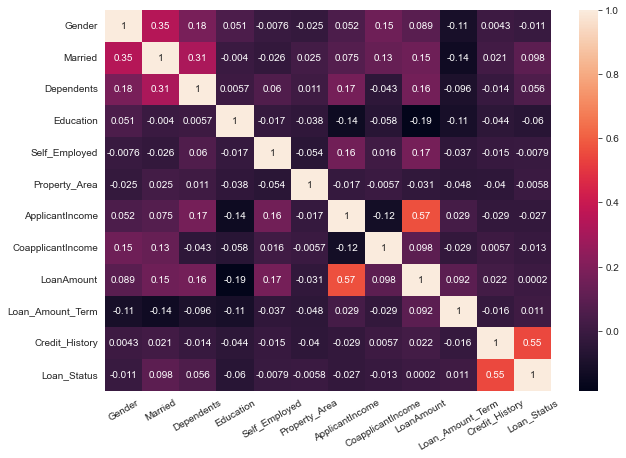

In [33]:
# Credit_History is the best feature
# plot correction matrix

data_corr = pd.concat([X_train, y_train], axis=1)
corr = data_corr.corr()
#print(corr)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.xticks(rotation=30)
plt.show()

The most significant factor affecting the loan approval is Credit History. However, there are 57% similarity between LoanAmount & ApplicantIncome which could also influences the performance of our model. Hence, the models can be improved further.

Evaluate the models on Test_data

In [34]:
print(X_test.head(), X_test.shape)

     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
350       1        1           0          0              0              1   
377       1        1           0          0              0              1   
163       1        1           2          0              0              0   
609       0        0           0          0              0              0   
132       1        0           0          0              0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
350           9083.0                0.0       228.0             360.0   
377           4310.0                0.0       130.0             360.0   
163           4167.0             1447.0       158.0             360.0   
609           2900.0                0.0        71.0             360.0   
132           2718.0                0.0        70.0             360.0   

     Credit_History  
350             1.0  
377             1.0  
163             1.0  
609       

In [35]:
x_test_new = X_test.copy()
for name, model in models.items():
    print(name, end='\n')
    eval(y_test, model.predict(x_test_new))
    print('-'*30)

LogisticRegression
pre: 0.756
 rec: 0.983
 f1: 0.855
 acc: 0.784

------------------------------
KNeighborsClassifier
pre: 0.627
 rec: 0.800
 f1: 0.703
 acc: 0.562

------------------------------
SVC
pre: 0.649
 rec: 1.000
 f1: 0.787
 acc: 0.649

------------------------------
DecisionTreeClassifier
pre: 0.752
 rec: 0.983
 f1: 0.852
 acc: 0.778

------------------------------


Among all models, the logisticRegression and DecisionTree are the most accurate and stable models. They show the consistent accuracy between train and test data. The models could be improved even further by tuning hyperparameters or training larger data.

In [36]:
# Hyperparameter tuning for LogisticRegression model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#Scaling
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
#Define parameters
lrm = LogisticRegression(random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=lrm, param_grid=grid, cv=kf, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820547 using {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}
0.296033 (0.009058) with: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.703967 (0.009058) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.703967 (0.009058) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820547 (0.018576) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
0.296033 (0.009058) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.818222 (0.019934) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.818222 (0.019934) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.820547 (0.018576) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [37]:
# Adopting new parameters to test test_data
x_test_new = X_test.copy()
newmodel = { 'LogisticRegression' : LogisticRegression(C=0.001, penalty='l2', solver='liblinear',random_state=42)}
for name, model in newmodel.items():
    print(name, end='\n')
    model.fit(X_train, y_train)
    print('Test_data accuracy score: ', accuracy_score(y_test, model.predict(x_test_new)))
    print('Train_data accuracy score: ', accuracy_score(y_train, model.predict(X_train)))


LogisticRegression
Test_data accuracy score:  0.7837837837837838
Train_data accuracy score:  0.8205128205128205


Conclusion:
Hyperparameter tuning has been done for LogisticRegression model. However, the accuracy score is not improved significantly, and remaining as 82% for training data and 78% for test data. Such phenomena may due to the low volume of data. When training models with larger data, the overall accuracy might be improved.